In [3]:
import os
import pandas as pd

data_dir = 'C:\\Users\\Cristina Jorge\\OneDrive\\Documentos\\GitHub\\Back-End-Elo\\data'
df = pd.read_csv(os.path.join(data_dir, 'brasileiro_2003_2023.csv'))
df


,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,Série A,2003.0,2003-03-29,Athletico-PR,2.0,0.0,Grêmio,VC,3.0,0.0,1.0
1,Série A,2003.0,2003-03-29,Guarani,4.0,2.0,Vasco,VC,3.0,0.0,2.0
2,Série A,2003.0,2003-03-30,Vitória,1.0,1.0,Figueirense,E,1.0,1.0,12.0
3,Série A,2003.0,2003-03-30,Goiás,2.0,2.0,Paysandu,E,1.0,1.0,4.0
4,Série A,2003.0,2003-03-30,Santos,2.0,2.0,Paraná,E,1.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
8412,Série A,2023.0,2023-12-06,São Paulo,1.0,0.0,Flamengo,VC,3.0,0.0,376.0
8413,Série A,2023.0,2023-12-06,Vasco,2.0,1.0,Red Bull Bragantino,VC,3.0,0.0,377.0
8414,Série A,2023.0,2023-12-06,Fluminense,2.0,3.0,Grêmio,VV,0.0,3.0,378.0
8415,Série A,2023.0,2023-12-06,Santos,1.0,2.0,Fortaleza,VV,0.0,3.0,379.0


In [4]:
df.dtypes# Assuming df is your DataFrame and 'column_name' is the column you want to change
df['Temp'] = df['Temp'].astype(str)

In [10]:
years_to_filter = ['2020.0', '2019.0', '2018.0']
filt = df['Temp'].isin(years_to_filter)
df = df[filt]
df.to_csv('Data/brasileiro_2018_2020.csv')

In [12]:
df

,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
6137,Série A,2018.0,2018-04-14,Cruzeiro,0.0,1.0,Grêmio,VV,0.0,3.0,1.0
6138,Série A,2018.0,2018-04-14,Vitória,2.0,2.0,Flamengo,E,1.0,1.0,2.0
6139,Série A,2018.0,2018-04-14,Santos,2.0,0.0,Ceará,VC,3.0,0.0,3.0
6140,Série A,2018.0,2018-04-15,Athletico-PR,5.0,1.0,Chapecoense,VC,3.0,0.0,8.0
6141,Série A,2018.0,2018-04-15,Vasco,2.0,1.0,Atlético-MG,VC,3.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
7272,Série A,2020.0,2021-02-25,Vasco,3.0,2.0,Goiás,VC,3.0,0.0,104.0
7273,Série A,2020.0,2021-02-25,Internacional,0.0,0.0,Corinthians,E,1.0,1.0,108.0
7274,Série A,2020.0,2021-02-25,Atlético-MG,2.0,0.0,Palmeiras,VC,3.0,0.0,107.0
7275,Série A,2020.0,2021-02-25,São Paulo,2.0,1.0,Flamengo,VC,3.0,0.0,105.0


In [13]:
import pandas as pd

def update_team_stats(df):
    team_stats = {}

    for index, row in df.iterrows():
        home_team, away_team = row['Casa'], row['Fora']
        result = row['Res']

        # Update home team stats
        team_stats.setdefault(home_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[home_team]['Jogos'] += 1
        team_stats[home_team]['Gols'] += row['GC']

        if result == 'VC':
            team_stats[home_team]['Vitórias'] += 1
            team_stats[home_team]['Pontos'] += 3
        elif result == 'VV':
            team_stats[home_team]['Derrotas'] += 1
        else:
            team_stats[home_team]['Empates'] += 1
            team_stats[home_team]['Pontos'] += 1

        # Update away team stats
        team_stats.setdefault(away_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[away_team]['Jogos'] += 1
        team_stats[away_team]['Gols'] += row['GF']

        if result == 'VC':
            team_stats[away_team]['Derrotas'] += 1
        elif result == 'VV':
            team_stats[away_team]['Vitórias'] += 1
            team_stats[away_team]['Pontos'] += 3
        else:
            team_stats[away_team]['Empates'] += 1
            team_stats[away_team]['Pontos'] += 1

    # Create a DataFrame with team statistics
    team_stats_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
    team_stats_df = team_stats_df.rename(columns={'index': 'Time', 'Jogos': 'Partidas', 'Vitórias': 'Vitórias', 'Derrotas': 'Derrotas',
                                                  'Empates': 'Empates', 'Gols': 'Gols Marcados', 'Pontos': 'Pontuação'})

    # Calculating the percentage of victories, draws, and losses
    team_stats_df['Percentual Vitórias'] = (team_stats_df['Vitórias'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Empates'] = (team_stats_df['Empates'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Derrotas'] = (team_stats_df['Derrotas'] / team_stats_df['Partidas']) * 100

    # Calculating the percentage of total points based on the maximum possible points
    max_possible_points = team_stats_df['Partidas'] * 3
    team_stats_df['Aproveitamento'] = (team_stats_df['Pontuação'] / max_possible_points) * 100
    team_stats_df = team_stats_df.sort_values(by='Aproveitamento', ascending=False)

    return team_stats_df

# Example usage:
team_stats_df = update_team_stats(df)
print(team_stats_df)
team_stats_df.to_csv('Data/estatisticas_brasileirao_2018_2020.csv')
team_stats_df.to_excel('Data/estatisticas_brasileirao_2018_2020.csv')




                   Time  Partidas  Vitórias  Derrotas  Empates  Gols Marcados  \
3              Flamengo       114        70        21       23          213.0   
17            Palmeiras       114        59        20       35          176.0   
10        Internacional       114        55        29       30          155.0   
18            São Paulo       114        51        23       40          144.0   
1                Grêmio       114        51        26       37          165.0   
4                Santos       114        49        34       31          158.0   
9           Atlético-MG       114        50        39       25          165.0   
6          Athletico-PR       114        49        38       27          143.0   
25  Red Bull Bragantino        38        13        11       14           50.0   
13           Fluminense       114        42        43       29          125.0   
12          Corinthians       114        38        39       37          121.0   
26          Atlético-GO     

ValueError: No engine for filetype: 'csv'

In [14]:
team_stats_df

,Time,Partidas,Vitórias,Derrotas,Empates,Gols Marcados,Pontuação,Percentual Vitórias,Percentual Empates,Percentual Derrotas,Aproveitamento
3,Flamengo,114,70,21,23,213.0,233,61.403509,20.175439,18.421053,68.128655
17,Palmeiras,114,59,20,35,176.0,212,51.754386,30.701754,17.543860,61.988304
10,Internacional,114,55,29,30,155.0,195,48.245614,26.315789,25.438596,57.017544
18,São Paulo,114,51,23,40,144.0,193,44.736842,35.087719,20.175439,56.432749
1,Grêmio,114,51,26,37,165.0,190,44.736842,32.456140,22.807018,55.555556
4,Santos,114,49,34,31,158.0,178,42.982456,27.192982,29.824561,52.046784
9,Atlético-MG,114,50,39,25,165.0,175,43.859649,21.929825,34.210526,51.169591
6,Athletico-PR,114,49,38,27,143.0,174,42.982456,23.684211,33.333333,50.877193
25,Red Bull Bragantino,38,13,11,14,50.0,53,34.210526,36.842105,28.947368,46.491228
13,Fluminense,114,42,43,29,125.0,155,36.842105,25.438596,37.719298,45.321637


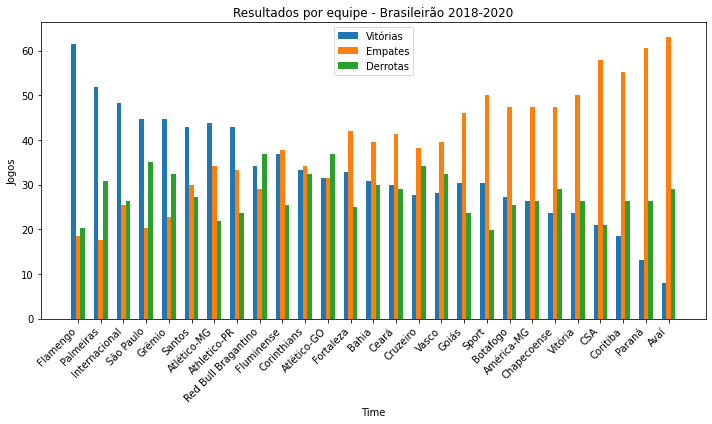

In [15]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Time']
victories = team_stats_df['Percentual Vitórias']
draws = team_stats_df['Percentual Derrotas']
losses = team_stats_df['Percentual Empates']

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(teams))

bar1 = ax.bar(index, victories, bar_width, label='Vitórias')
bar2 = ax.bar([i + bar_width for i in index], draws, bar_width, label='Empates')
bar3 = ax.bar([i + 2 * bar_width for i in index], losses, bar_width, label='Derrotas')

# Adding labels, title, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Jogos')
ax.set_title('Resultados por equipe - Brasileirão 2018-2020')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()

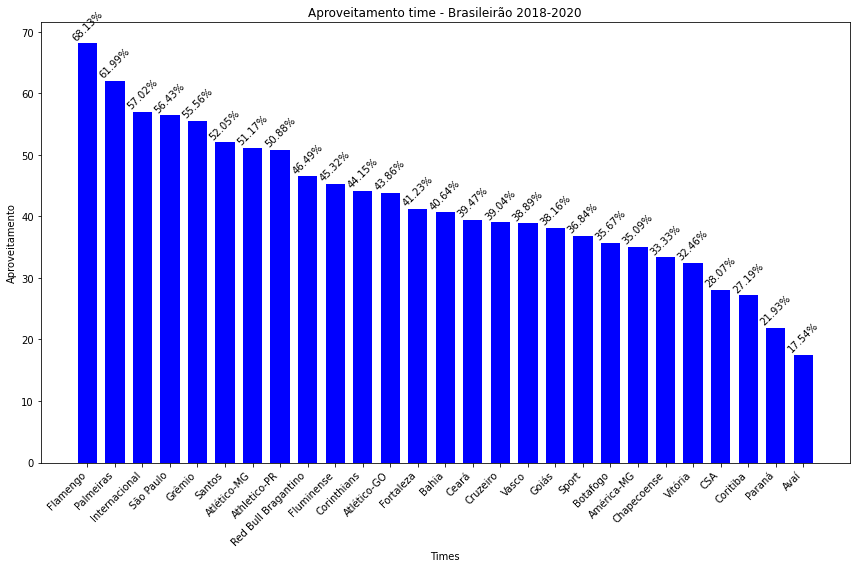

In [16]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Time']
victory_percentage = team_stats_df['Aproveitamento']

# Sort teams by the percentage of victories
sorted_indices = victory_percentage.argsort()[::-1]
sorted_teams = teams.iloc[sorted_indices]
sorted_percentages = victory_percentage.iloc[sorted_indices]

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figsize for more spacing

bar_width = 0.7  # Increase bar_width for more spacing
index = range(len(sorted_teams))

# Change the color to blue
bars = ax.bar(index, sorted_percentages, bar_width, color='blue')

# Adding labels, title, and legend
ax.set_xlabel('Times')
ax.set_ylabel('Aproveitamento')
ax.set_title('Aproveitamento time - Brasileirão 2018-2020')
ax.set_xticks(index)
ax.set_xticklabels(sorted_teams, rotation=45, ha='right')

# Display the percentages on top of the bars with rotation
for bar, percentage in zip(bars, sorted_percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.2f}%', ha='center', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
